<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Head-et-Tail" data-toc-modified-id="Head-et-Tail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Head et Tail</a></span></li><li><span><a href="#Columns-et-Index" data-toc-modified-id="Columns-et-Index-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Columns et Index</a></span></li><li><span><a href="#Filtrer-les-lignes-et-les-colonnes" data-toc-modified-id="Filtrer-les-lignes-et-les-colonnes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtrer les lignes et les colonnes</a></span></li><li><span><a href="#drop" data-toc-modified-id="drop-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>drop</a></span></li></ul></div>

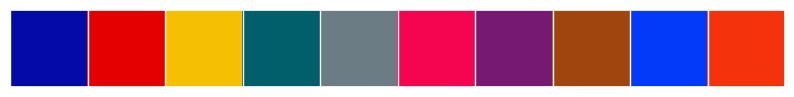

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os, warnings, math, yaml, pickle
from IPython.display import Image, display
from functools       import partial
from pathlib import Path

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
warnings.filterwarnings(action="ignore")

sns.set(font_scale=2)
random_seed = 123456789
np.random.seed(random_seed)
palette = ["#030aa7","#e50000","#f5bf03","#005f6a","#6b7c85",
           "#f5054f","#751973","#a0450e","#0339f8","#f4320c"]
sns.palplot(sns.color_palette(palette))

In [2]:
%%time
meteo = pd.read_parquet('../donnees/meteo.gzip', engine='pyarrow')
meteo.dtypes

CPU times: total: 938 ms
Wall time: 240 ms


Nom                      object
Latitude                float64
Longitude               float64
Altitude                  int16
Zone                     object
DateHeure        datetime64[us]
DirectionVent           float64
VitesseVent             float64
Temperature             float64
Humidite                float64
Visibilite              float64
Pression                float64
Mois                      int32
Annee                     int32
AnneeMois                 int32
Semaine                  UInt32
MoisJour                  int32
JourA                     int32
Precipitation           float64
dtype: object

In [3]:
meteo.shape

(3345920, 19)

In [4]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345920 entries, 0 to 3345919
Data columns (total 19 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Nom            object        
 1   Latitude       float64       
 2   Longitude      float64       
 3   Altitude       int16         
 4   Zone           object        
 5   DateHeure      datetime64[us]
 6   DirectionVent  float64       
 7   VitesseVent    float64       
 8   Temperature    float64       
 9   Humidite       float64       
 10  Visibilite     float64       
 11  Pression       float64       
 12  Mois           int32         
 13  Annee          int32         
 14  AnneeMois      int32         
 15  Semaine        UInt32        
 16  MoisJour       int32         
 17  JourA          int32         
 18  Precipitation  float64       
dtypes: UInt32(1), datetime64[us](1), float64(9), int16(1), int32(5), object(2)
memory usage: 392.5+ MB


# Head et Tail 

In [5]:
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,1996-01-01 00:00:00,170.0,2.0,2.89,99.0,NaN,990.9,1,1996,199601,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,1996-01-01 03:00:00,130.0,3.0,2.70,99.0,NaN,990.7,1,1996,199601,1,101,1,0.2
2,Abbeville,50.136,1.834,69,NO,1996-01-01 06:00:00,120.0,3.0,2.89,99.0,0.1,990.9,1,1996,199601,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1996-01-01 09:00:00,130.0,4.1,3.60,99.0,0.8,991.1,1,1996,199601,1,101,1,0.0
4,Abbeville,50.136,1.834,69,NO,1996-01-01 12:00:00,100.0,5.1,4.39,99.0,1.6,990.4,1,1996,199601,1,101,1,0.0


In [6]:
meteo.tail()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
3345915,Bastia,42.540667,9.485167,10,SE,2023-11-30 09:00:00,210.0,2.1,13.1,69.0,35.41,1002.9,11,2023,202311,48,1130,334,0.0
3345916,Bastia,42.540667,9.485167,10,SE,2023-11-30 12:00:00,20.0,1.1,18.8,58.0,30.64,1001.6,11,2023,202311,48,1130,334,0.0
3345917,Bastia,42.540667,9.485167,10,SE,2023-11-30 15:00:00,350.0,2.0,18.8,62.0,40.03,1001.2,11,2023,202311,48,1130,334,0.0
3345918,Bastia,42.540667,9.485167,10,SE,2023-11-30 18:00:00,210.0,1.7,12.6,84.0,20.17,1001.4,11,2023,202311,48,1130,334,0.0
3345919,Bastia,42.540667,9.485167,10,SE,2023-11-30 21:00:00,250.0,2.2,11.6,86.0,21.91,1001.7,11,2023,202311,48,1130,334,0.0


# Columns et Index

In [7]:
meteo.columns

Index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure',
       'DirectionVent', 'VitesseVent', 'Temperature', 'Humidite', 'Visibilite',
       'Pression', 'Mois', 'Annee', 'AnneeMois', 'Semaine', 'MoisJour',
       'JourA', 'Precipitation'],
      dtype='object')

In [8]:
meteo.index

RangeIndex(start=0, stop=3345920, step=1)

# Filtrer les lignes et les colonnes

In [9]:
meteo.iloc[1:10,1:10]

,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite
1,50.136,1.834,69,NO,1996-01-01 03:00:00,130.0,3.0,2.70,99.0
2,50.136,1.834,69,NO,1996-01-01 06:00:00,120.0,3.0,2.89,99.0
3,50.136,1.834,69,NO,1996-01-01 09:00:00,130.0,4.1,3.60,99.0
4,50.136,1.834,69,NO,1996-01-01 12:00:00,100.0,5.1,4.39,99.0
5,50.136,1.834,69,NO,1996-01-01 15:00:00,130.0,3.0,4.30,99.0
6,50.136,1.834,69,NO,1996-01-01 18:00:00,100.0,4.1,3.39,99.0
7,50.136,1.834,69,NO,1996-01-01 21:00:00,90.0,4.1,3.60,99.0
8,50.136,1.834,69,NO,1996-01-02 00:00:00,90.0,4.1,3.80,99.0
9,50.136,1.834,69,NO,1996-01-02 03:00:00,80.0,5.1,3.50,99.0


In [10]:
meteo.loc[1:10,]

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
1,Abbeville,50.136,1.834,69,NO,1996-01-01 03:00:00,130.0,3.0,2.70,99.0,NaN,990.7,1,1996,199601,1,101,1,0.2
2,Abbeville,50.136,1.834,69,NO,1996-01-01 06:00:00,120.0,3.0,2.89,99.0,0.1,990.9,1,1996,199601,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1996-01-01 09:00:00,130.0,4.1,3.60,99.0,0.8,991.1,1,1996,199601,1,101,1,0.0
4,Abbeville,50.136,1.834,69,NO,1996-01-01 12:00:00,100.0,5.1,4.39,99.0,1.6,990.4,1,1996,199601,1,101,1,0.0
5,Abbeville,50.136,1.834,69,NO,1996-01-01 15:00:00,130.0,3.0,4.30,99.0,0.1,990.7,1,1996,199601,1,101,1,0.0
6,Abbeville,50.136,1.834,69,NO,1996-01-01 18:00:00,100.0,4.1,3.39,99.0,NaN,991.6,1,1996,199601,1,101,1,0.0
7,Abbeville,50.136,1.834,69,NO,1996-01-01 21:00:00,90.0,4.1,3.60,99.0,NaN,991.7,1,1996,199601,1,101,1,0.0
8,Abbeville,50.136,1.834,69,NO,1996-01-02 00:00:00,90.0,4.1,3.80,99.0,NaN,992.7,1,1996,199601,1,102,2,0.0
9,Abbeville,50.136,1.834,69,NO,1996-01-02 03:00:00,80.0,5.1,3.50,99.0,NaN,994.1,1,1996,199601,1,102,2,0.0
10,Abbeville,50.136,1.834,69,NO,1996-01-02 06:00:00,60.0,2.0,2.80,99.0,0.3,996.3,1,1996,199601,1,102,2,0.0


In [11]:
meteo.loc[1:10,'Nom':'DateHeure']

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure
1,Abbeville,50.136,1.834,69,NO,1996-01-01 03:00:00
2,Abbeville,50.136,1.834,69,NO,1996-01-01 06:00:00
3,Abbeville,50.136,1.834,69,NO,1996-01-01 09:00:00
4,Abbeville,50.136,1.834,69,NO,1996-01-01 12:00:00
5,Abbeville,50.136,1.834,69,NO,1996-01-01 15:00:00
6,Abbeville,50.136,1.834,69,NO,1996-01-01 18:00:00
7,Abbeville,50.136,1.834,69,NO,1996-01-01 21:00:00
8,Abbeville,50.136,1.834,69,NO,1996-01-02 00:00:00
9,Abbeville,50.136,1.834,69,NO,1996-01-02 03:00:00
10,Abbeville,50.136,1.834,69,NO,1996-01-02 06:00:00


In [12]:
meteo.loc[1:10,['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'Temperature', 'Mois', 'Annee', 'Semaine']]

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,Semaine
1,Abbeville,50.136,1.834,69,NO,2.70,1,1996,1
2,Abbeville,50.136,1.834,69,NO,2.89,1,1996,1
3,Abbeville,50.136,1.834,69,NO,3.60,1,1996,1
4,Abbeville,50.136,1.834,69,NO,4.39,1,1996,1
5,Abbeville,50.136,1.834,69,NO,4.30,1,1996,1
6,Abbeville,50.136,1.834,69,NO,3.39,1,1996,1
7,Abbeville,50.136,1.834,69,NO,3.60,1,1996,1
8,Abbeville,50.136,1.834,69,NO,3.80,1,1996,1
9,Abbeville,50.136,1.834,69,NO,3.50,1,1996,1
10,Abbeville,50.136,1.834,69,NO,2.80,1,1996,1


# drop

In [13]:
meteo.columns

Index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure',
       'DirectionVent', 'VitesseVent', 'Temperature', 'Humidite', 'Visibilite',
       'Pression', 'Mois', 'Annee', 'AnneeMois', 'Semaine', 'MoisJour',
       'JourA', 'Precipitation'],
      dtype='object')

In [14]:
meteo.drop(columns=['DateHeure','DirectionVent', 'VitesseVent','Humidite', 'Visibilite', 'Pression' ]).head()

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,2.89,1,1996,199601,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,2.70,1,1996,199601,1,101,1,0.2
2,Abbeville,50.136,1.834,69,NO,2.89,1,1996,199601,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,3.60,1,1996,199601,1,101,1,0.0
4,Abbeville,50.136,1.834,69,NO,4.39,1,1996,199601,1,101,1,0.0


In [15]:
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,1996-01-01 00:00:00,170.0,2.0,2.89,99.0,NaN,990.9,1,1996,199601,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,1996-01-01 03:00:00,130.0,3.0,2.70,99.0,NaN,990.7,1,1996,199601,1,101,1,0.2
2,Abbeville,50.136,1.834,69,NO,1996-01-01 06:00:00,120.0,3.0,2.89,99.0,0.1,990.9,1,1996,199601,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1996-01-01 09:00:00,130.0,4.1,3.60,99.0,0.8,991.1,1,1996,199601,1,101,1,0.0
4,Abbeville,50.136,1.834,69,NO,1996-01-01 12:00:00,100.0,5.1,4.39,99.0,1.6,990.4,1,1996,199601,1,101,1,0.0


In [16]:
meteo.drop(columns=['DateHeure','DirectionVent', 'VitesseVent','Humidite', 'Visibilite', 'Pression' ], inplace=True)
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,2.89,1,1996,199601,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,2.70,1,1996,199601,1,101,1,0.2
2,Abbeville,50.136,1.834,69,NO,2.89,1,1996,199601,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,3.60,1,1996,199601,1,101,1,0.0
4,Abbeville,50.136,1.834,69,NO,4.39,1,1996,199601,1,101,1,0.0
